In [1]:
import random
import time

import numpy as np

import Data
from signature_mahalanobis_knn import SignatureMahalanobisKNN
import UCR_data_support

In [2]:
seed = 2023
random.seed(seed)
np.random.seed(seed)

### UCR data example

In [3]:
data = Data.Data(if_sample=False)
data_full_names = [
    "Adiac",
    "ArrowHead",
    "Beef",
    "BeetleFly",
    "BirdChicken",
    "CBF",
    "ChlorineConcentration",
    "Coffee",
    "ECG200",
    "ECGFiveDays",
    "FaceFour",
    "GunPoint",
    "Ham",
    "Herring",
    "Lightning2",
    "Lightning7",
    "Meat",
    "MedicalImages",
    "MoteStrain",
    "Plane",
    "Strawberry",
    "Symbols",
    "ToeSegmentation1",
    "ToeSegmentation2",
    "Trace",
    "TwoLeadECG",
    "Wafer",
    "Wine",
]

In [4]:
n_neighbours = 10

In [5]:
t0 = time.time()

depth = 5
signature_maha_knn = SignatureMahalanobisKNN(n_jobs=-1, random_state=seed)

iter = 10
data_names = data_full_names

anomaly_level = 0.001
roughpathsbest_001, roughpathserror_001 = UCR_data_support.compute_best_and_std(
    data_set=data_names,
    iter=iter,
    data=data,
    signature_maha_knn=signature_maha_knn,
    depth=depth,
    n_neighbours=n_neighbours,
    anomaly_level=anomaly_level,
)

anomaly_level = 0.05
roughpathsbest_05, roughpathserror_05 = UCR_data_support.compute_best_and_std(
    data_set=data_names,
    iter=iter,
    data=data,
    signature_maha_knn=signature_maha_knn,
    depth=depth,
    n_neighbours=n_neighbours,
    anomaly_level=anomaly_level,
)

total_time = time.time() - t0
print(f"Total experiment time: {total_time} seconds | {total_time / 60} minutes")

/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/rough_paths/signature_mahalanobis_knn/src/signature_mahalanobis_knn/sig_mahal_knn.py:267: RuntimeWarning: invalid value encountered in divide
  rho = numerator / denominator
/Users/rchan/Library/CloudStorage/OneDri

Total experiment time: 599.4604649543762 seconds | 9.991007749239603 minutes


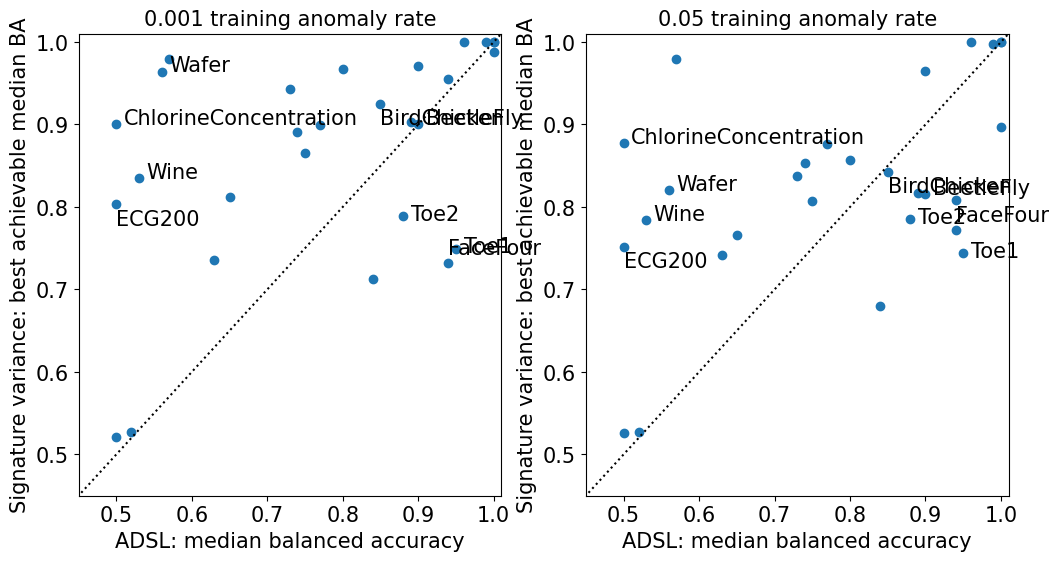

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
comparison_table_1 = UCR_data_support.plot_ucr_result(
    roughpathsbest_001, roughpathserror_001, anomaly_level=0.001, ax_num=0, axs=axs
)
comparison_table_2 = UCR_data_support.plot_ucr_result(
    roughpathsbest_05, roughpathserror_05, anomaly_level=0.05, ax_num=1, axs=axs
)
fig.savefig("results/ucr_benchmark.pdf")
plt.show()

In [7]:
comparison_table_1

,dataset,conformance,conformance standard deviation,ADSL,ADSL standard deviation
0,Adiac,1.0,0.0,0.99,0.1
1,ArrowHead,0.811907,0.071193,0.65,0.03
2,Beef,0.979167,0.184142,0.57,0.15
3,BeetleFly,0.9,0.063246,0.9,0.08
4,BirdChicken,0.925,0.106066,0.85,0.15
5,CBF,0.967742,0.015535,0.8,0.04
6,ChlorineConcentration,0.900055,0.008477,0.5,0.0
7,Coffee,0.712963,0.109487,0.84,0.04
8,ECG200,0.8031,0.067772,0.5,0.03
9,ECGFiveDays,0.954635,0.01547,0.94,0.11


In [ ]:
sum(comparison_table_1["conformance"] >= comparison_table_1["ADSL"])

In [8]:
comparison_table_1.to_csv("results/ucr_comparison_table_1.csv")

In [9]:
comparison_table_2

,dataset,conformance,conformance standard deviation,ADSL,ADSL standard deviation
0,Adiac,0.998026,0.133116,0.99,0.1
1,ArrowHead,0.765734,0.081071,0.65,0.03
2,Beef,0.979167,0.184142,0.57,0.15
3,BeetleFly,0.815789,0.201754,0.9,0.08
4,BirdChicken,0.842105,0.105801,0.85,0.15
5,CBF,0.857518,0.033788,0.8,0.04
6,ChlorineConcentration,0.877558,0.012585,0.5,0.0
7,Coffee,0.679487,0.129734,0.84,0.04
8,ECG200,0.751502,0.073813,0.5,0.03
9,ECGFiveDays,0.80789,0.017789,0.94,0.11


In [10]:
comparison_table_2.to_csv("results/ucr_comparison_table_2.csv")

In [15]:
sum(comparison_table_1["conformance"] >= comparison_table_1["ADSL"])

23

In [16]:
sum(comparison_table_2["conformance"] >= comparison_table_2["ADSL"])

19